<a href="https://colab.research.google.com/github/puneetsingla17/pytorch_geometric_intro/blob/master/GCN_graphclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.9 MB/s eta 0:00:00


In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv,GCN,aggr,pool
from torch_geometric.data import DataLoader
import torch.nn.functional as f
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
from torch_geometric.datasets import TUDataset
dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')

Extracting /tmp/ENZYMES/ENZYMES/ENZYMES.zip
Processing...
Done!


In [ ]:
print(len(dataset))

600


In [ ]:
dataset.num_node_features

3

In [ ]:
dataset.data

/usr/local/lib/python3.10/dist-packages/torch_geometric/data/in_memory_dataset.py:284: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. The data of the dataset is already cached, so any modifications to `data` will not be reflected when accessing its elements. Clearing the cache now by removing all elements in `dataset._data_list`. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


Data(x=[19580, 3], edge_index=[2, 74564], y=[600])

In [ ]:
traindataset=dataset[:540]
testdataset=dataset[540:]
shuffledtrain=torch.randperm(len(traindataset))
traind=traindataset[shuffledtrain]

In [ ]:
loader = DataLoader(traind, batch_size=32, shuffle=True)

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [ ]:
class net(torch.nn.Module):
  def __init__(self,):
    super().__init__()
    self.conv1=GCN(dataset.num_node_features,32,num_layers=2)
    self.conv2=GCN(32,dataset.num_classes,num_layers=2)

  def forward(self,data):
    x,edge_index=data.x,data.edge_index
    x=self.conv1(x,edge_index,batch=data.batch)
    x=f.relu(x)
    x=f.dropout(x,training=self.training)
    x=self.conv2(x,edge_index,batch=data.batch)
    x=pool.global_mean_pool(x,batch=data.batch)
    return f.log_softmax(x,dim=1)

In [ ]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=net().to(device)

In [ ]:
optimizer=torch.optim.Adam(model.parameters(),lr=0.01,weight_decay=5e-4)

In [ ]:
model.train()

net(
  (conv1): GCN(3, 32, num_layers=2)
  (conv2): GCN(32, 6, num_layers=2)
)

In [ ]:
traind=traindataset[shuffledtrain]

In [ ]:
conv1=GCNConv(dataset.num_node_features,16)

In [ ]:
trainloss=[]
for i in range(10):
  tloss=[]
  for e in loader:
    optimizer.zero_grad()
    out=model.forward(e)
    loss=f.nll_loss(out,e.y,)
    loss.backward()
    optimizer.step()
    tloss.append(loss.item())
  trainloss.extend(tloss)


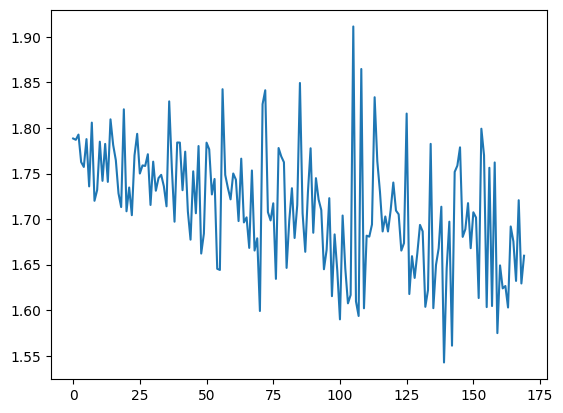

In [ ]:
plt.plot(trainloss)

In [ ]:
l1=dict(model.conv1.named_parameters())

In [ ]:
l1.keys()

dict_keys(['convs.0.bias', 'convs.0.lin.weight', 'convs.1.bias', 'convs.1.lin.weight'])